In [1]:
import pyreadr
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import os

In [2]:
n_funcs = 3
n_algos = 2

regrets_mean_full = []
regrets_se_full = []

for i in range(n_funcs):
    regrets_mean_full.append([])
    regrets_se_full.append([])

In [3]:
##----------------------Regrets----------------------------------------------------------



#---------------------------------------------------------------------

##FUNCTION Camel 6h
folder = './camel6h/'
file_label = 'camel6h'
d = 2
min_step = 19
max_step = 148

alg_labels = ['DGP SI UCB','DGP SI EI']
regret_labels = ['DGPUCB','DGPSIEI']

time_labels = ['DGPUCB','DGPSIEI']


reps = 10
steps = 149
regret = np.zeros((n_algos,steps-min_step))
regret_se = np.zeros((n_algos,steps-min_step))
i = 0
print("Camel6h")
for label in alg_labels:
    file = folder+file_label+' ' + label+'.mat'
    data = sio.loadmat(file)
    regret_data = np.array(data['regret_' + regret_labels[i]])[:,min_step:steps]
    regret[i,:] = np.mean(regret_data[:],axis = 0)
    regret_se[i,:] = np.std(regret_data[:],axis = 0)/np.sqrt(reps)
    i = i + 1
    print(i)

regrets_mean_full[0] = regret
regrets_se_full[0] = regret_se
#---------------------------------------------------------------------------------------------
##FUNCTION Hartmann3
folder = './hart3/'
file_label = 'hart3'
d = 3
min_step = 5*d -1
max_step = 199
steps = 200

alg_labels = ['DGP SI UCB','DGP SI EI']
regret_labels = ['DGPUCB','DGPSIEI']

time_labels = ['DGPUCB','DGPSIEI']


reps = 10
steps = 200
regret = np.zeros((n_algos,steps-min_step))
regret_se = np.zeros((n_algos,steps-min_step))
i = 0
print("hart3")
for label in alg_labels:
    file = folder+file_label+' ' + label+'.mat'
    data = sio.loadmat(file)
    regret_data = np.array(data['regret_' + regret_labels[i]])[:,min_step:steps]
    regret[i,:] = np.mean(regret_data[:],axis = 0)
    regret_se[i,:] = np.std(regret_data[:],axis = 0)/np.sqrt(reps)
    i = i + 1
    print(i)

regrets_mean_full[1] = regret
regrets_se_full[1] = regret_se
#-------------------------------------------
##FUNCTION Hartmann4
folder = './hart4/'
file_label = 'hart4'
d = 4
min_step = 5*d -1
max_step = 199
steps = 200

alg_labels = ['DGP SI UCB','DGP SI EI']
regret_labels = ['DGPUCB','DGPSIEI']

time_labels = ['DGPUCB','DGPSIEI']


reps = 10
steps = 200
regret = np.zeros((n_algos,steps-min_step))
regret_se = np.zeros((n_algos,steps-min_step))
i = 0
print("hart4")
for label in alg_labels:
    file = folder+file_label+' ' + label+'.mat'
    data = sio.loadmat(file)
    regret_data = np.array(data['regret_' + regret_labels[i]])[:,min_step:steps]
    regret[i,:] = np.mean(regret_data[:],axis = 0)
    regret_se[i,:] = np.std(regret_data[:],axis = 0)/np.sqrt(reps)
    i = i + 1
    print(i)

regrets_mean_full[2] = regret
regrets_se_full[2] = regret_se

Camel6h
1
2
hart3
1
2
hart4
1
2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


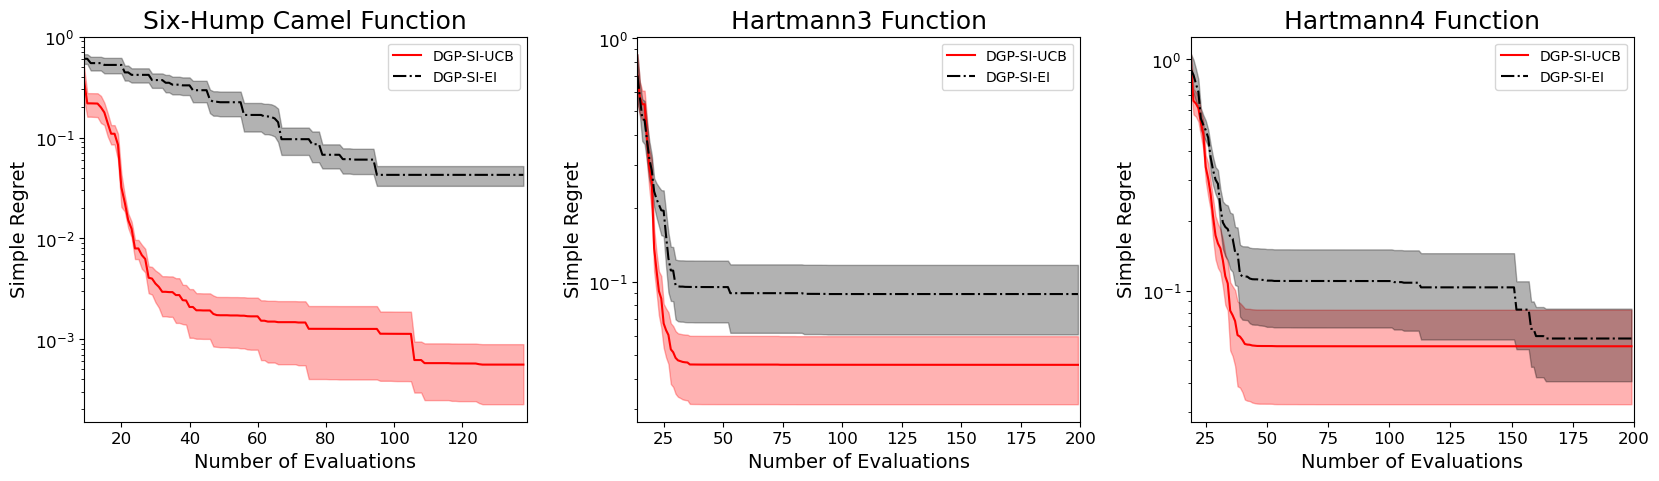

In [4]:
plt_labels = ['DGP-SI-UCB','DGP-SI-EI']
plt_titles = ['Six-Hump Camel Function','Hartmann3 Function','Hartmann4 Function']
fig,axs = plt.subplots(1,3)
min_steps= [9,14,19]

symbols = ['-','-.']
colors = ['r','k']

a = 20
b = 5

idx = 0
ax = axs[idx]
ax.figure.set_size_inches(a,b)


for i in range(regrets_mean_full[idx].shape[0]):
    plt_x = min_steps[idx] + np.arange(regrets_mean_full[idx].shape[1])
    plt_y = regrets_mean_full[idx][i,:]
    plt_e_l =  regrets_mean_full[idx][i,:] - regrets_se_full[idx][i,:]
    plt_e_u =  regrets_mean_full[idx][i,:] + regrets_se_full[idx][i,:]
    ax.plot(plt_x,plt_y,symbols[i],color = colors[i],label = plt_labels[i],markersize = 3)
    ax.fill_between(plt_x,plt_e_l,plt_e_u,color = colors[i],alpha=0.3)
    
ax.legend(loc=1)

ax.set_yscale('log')
ax.set_ylabel('Simple Regret',fontsize = 14)
ax.set_xlabel('Number of Evaluations',fontsize=14)
ax.set_title(plt_titles[idx],fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

ax.set_xlim([min_steps[idx],min_steps[idx] + regrets_mean_full[idx].shape[1]])

ax.set_yscale('log')

#----------------------------------------------------------------------------------
idx = 1
ax = axs[idx]
ax.figure.set_size_inches(a,b)


for i in range(regrets_mean_full[idx].shape[0]):
    plt_x = min_steps[idx] + np.arange(regrets_mean_full[idx].shape[1])
    plt_y = regrets_mean_full[idx][i,:]
    plt_e_l =  regrets_mean_full[idx][i,:] - regrets_se_full[idx][i,:]
    plt_e_u =  regrets_mean_full[idx][i,:] + regrets_se_full[idx][i,:]
    ax.plot(plt_x,plt_y,symbols[i],color = colors[i],label = plt_labels[i],markersize = 3)
    ax.fill_between(plt_x,plt_e_l,plt_e_u,color = colors[i],alpha=0.3)

ax.legend(loc=1)

ax.set_yscale('log')
ax.set_ylabel('Simple Regret',fontsize = 14)
ax.set_xlabel('Number of Evaluations',fontsize=14)
ax.set_title(plt_titles[idx],fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

ax.set_xlim([min_steps[idx],min_steps[idx] + regrets_mean_full[idx].shape[1]])

ax.set_yscale('log')

#---------------------------------------------------------------------------------------------------
idx = 2
ax = axs[idx]
ax.figure.set_size_inches(a,b)


for i in range(regrets_mean_full[idx].shape[0]):
    plt_x = min_steps[idx] + np.arange(regrets_mean_full[idx].shape[1])
    plt_y = regrets_mean_full[idx][i,:]
    plt_e_l =  regrets_mean_full[idx][i,:] - regrets_se_full[idx][i,:]
    plt_e_u =  regrets_mean_full[idx][i,:] + regrets_se_full[idx][i,:]
    ax.plot(plt_x,plt_y,symbols[i],color = colors[i],label = plt_labels[i],markersize = 3)
    ax.fill_between(plt_x,plt_e_l,plt_e_u,color = colors[i],alpha=0.3)
    
ax.legend(loc=1)

# ax.set_yscale('log')
ax.set_ylabel('Simple Regret',fontsize = 14)
ax.set_xlabel('Number of Evaluations',fontsize=14)
ax.set_title(plt_titles[idx],fontsize = 18)
ax.tick_params(axis = 'x',labelsize = 12)
ax.tick_params(axis = 'y',labelsize = 12)

ax.set_xlim([min_steps[idx],min_steps[idx] + regrets_mean_full[idx].shape[1]])

ax.set_yscale('log')
 
fig.subplots_adjust(wspace = 0.25,hspace = 0.3)
# plt.savefig('Analytical_Regrets_UCB_EI.pdf', format='pdf',pad_inches=0)
plt.savefig('Analytical_Regrets_UCB_EI.eps', format='eps',pad_inches=0)